In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "data/bf3_data_2022_01_07.xlsx"

In [3]:
df = pd.read_excel(path)
print(df)

            DATE_TIME   CB_FLOW  CB_PRESS  CB_TEMP  STEAM_FLOW  STEAM_TEMP  \
0      01-07-21 00:10  311727.0      3.15    129.0         4.0       213.0   
1      01-07-21 00:20  315163.0      3.16    129.0         4.0       209.0   
2      01-07-21 00:30  314595.0      3.16    128.0         4.0       205.0   
3      01-07-21 00:40  312465.0      3.16    127.0         4.0       200.0   
4      01-07-21 00:50  302981.0      3.11    126.0         4.0       194.0   
...               ...       ...       ...      ...         ...         ...   
25400  31-12-21 23:10  278198.0      2.75     76.0         2.0       189.0   
25401  31-12-21 23:20  286486.0      2.80     77.0         1.0       190.0   
25402  31-12-21 23:30  284500.0      2.81     77.0         0.0       191.0   
25403  31-12-21 23:40  284455.0      2.83     77.0         1.0       190.0   
25404  31-12-21 23:50  274728.0      2.73     77.0         2.0       189.0   

       STEAM_PRESS  O2_PRESS  O2_FLOW  O2_PER  ...  TOP_TEMP2  

In [4]:
k = df.columns

In [5]:
# Removing missing values
df.dropna(inplace=True)

In [6]:
df.dtypes

DATE_TIME         object
CB_FLOW          float64
CB_PRESS         float64
CB_TEMP          float64
STEAM_FLOW       float64
STEAM_TEMP       float64
STEAM_PRESS      float64
O2_PRESS         float64
O2_FLOW          float64
O2_PER           float64
PCI              float64
ATM_HUMID        float64
HB_TEMP          float64
HB_PRESS         float64
TOP_PRESS        float64
TOP_TEMP1        float64
TOP_TEMP2        float64
TOP_TEMP3        float64
TOP_TEMP4        float64
TOP_SPRAY        float64
TOP_TEMP         float64
TOP_PRESS_1      float64
CO               float64
CO2              float64
H2               float64
SKIN_TEMP_AVG    float64
dtype: object

<AxesSubplot: xlabel='ATM_HUMID', ylabel='Count'>

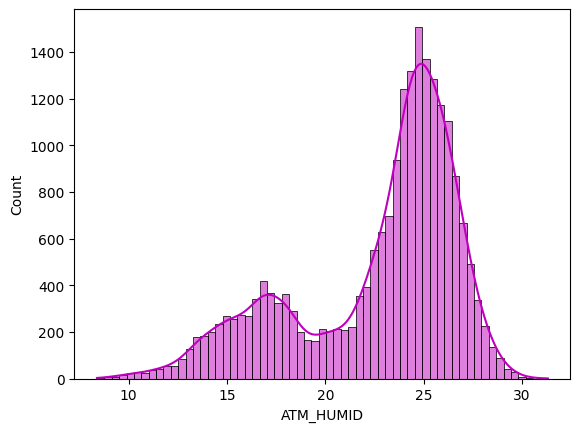

In [7]:
sns.histplot(df["ATM_HUMID"], kde=True, color="m")

<AxesSubplot: xlabel='CB_FLOW', ylabel='Count'>

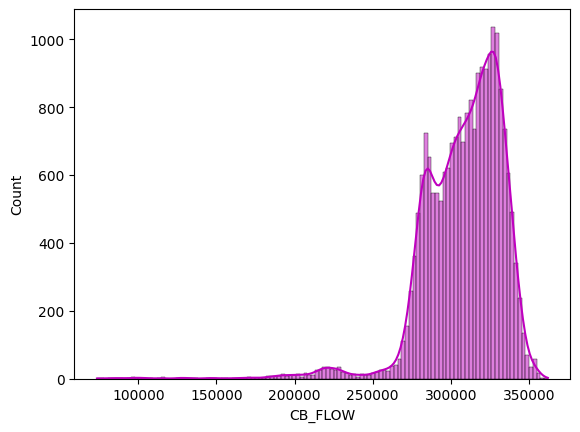

In [8]:
sns.histplot(df["CB_FLOW"], kde=True, color="m")

<AxesSubplot: xlabel='CB_PRESS', ylabel='Count'>

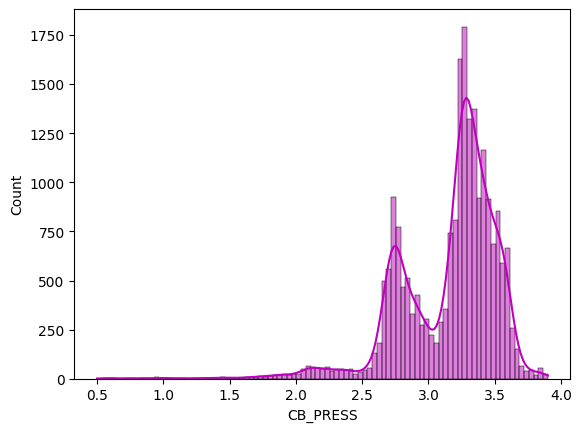

In [9]:
sns.histplot(df["CB_PRESS"], kde=True, color="m")

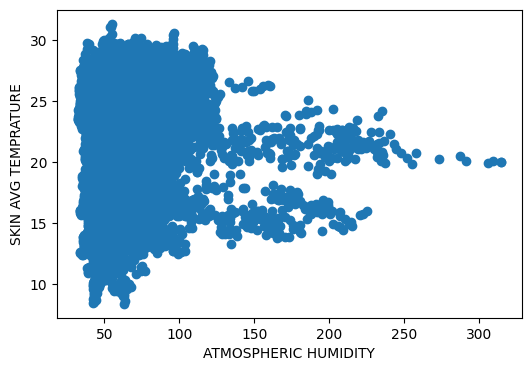

In [10]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(df["SKIN_TEMP_AVG"], df["ATM_HUMID"])
ax.set_xlabel('ATMOSPHERIC HUMIDITY')
ax.set_ylabel('SKIN AVG TEMPRATURE')
plt.show()

In [11]:
data = {}
for i in df.columns:
    data[i] = df[i]
df1 = pd.DataFrame(data)

In [12]:
df1['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'])

C:\Users\sujan\AppData\Local\Temp\ipykernel_21160\439492093.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


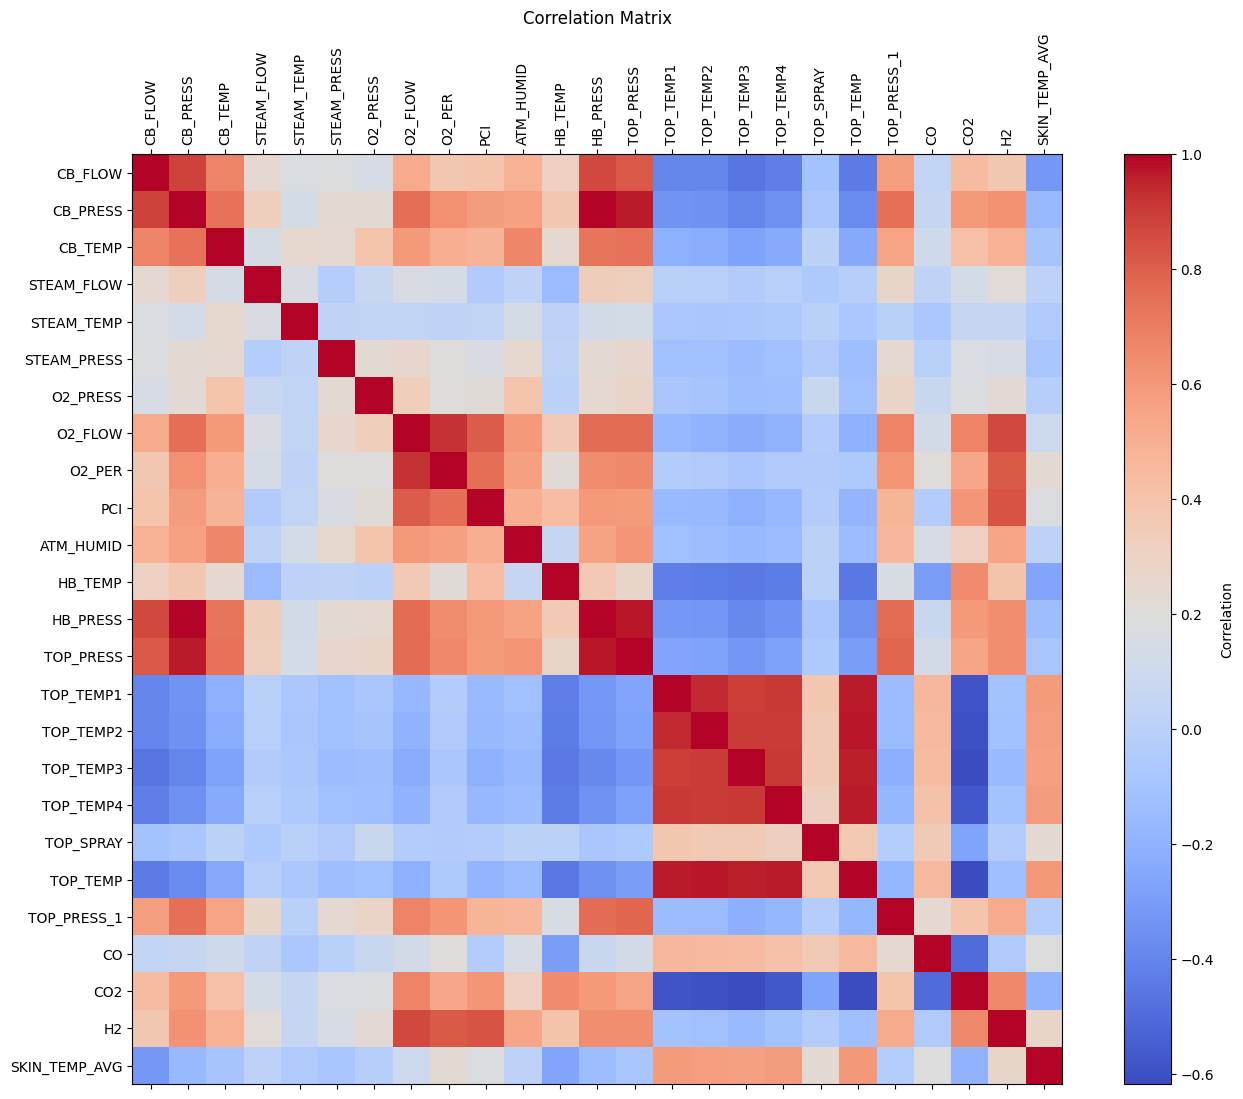

In [13]:
corr = df.corr()

# Plot correlation matrix
plt.figure(figsize=(16, 12))
plt.matshow(corr, cmap='coolwarm', fignum=1)
plt.colorbar(label='Correlation')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Correlation Matrix')
plt.show()

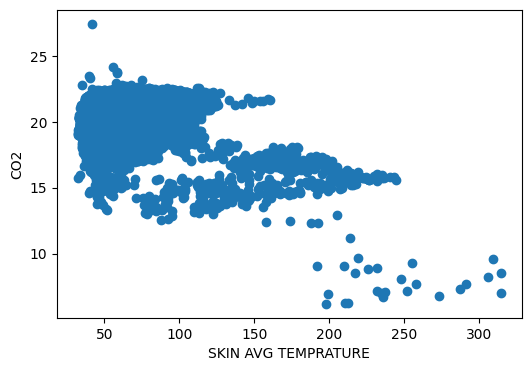

In [14]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(df["SKIN_TEMP_AVG"], df["CO2"])
ax.set_xlabel('SKIN AVG TEMPRATURE')
ax.set_ylabel('CO2')
plt.show()

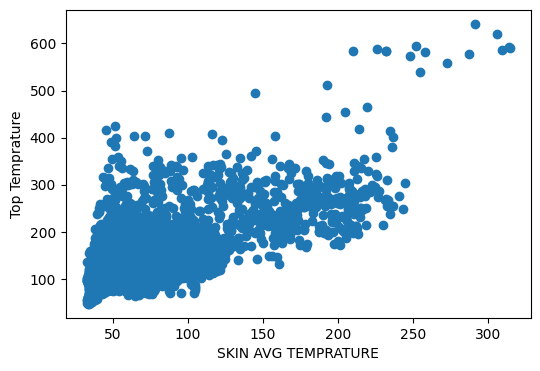

In [15]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(df["SKIN_TEMP_AVG"], df["TOP_TEMP"])
ax.set_xlabel('SKIN AVG TEMPRATURE')
ax.set_ylabel('Top Temprature')
plt.show()

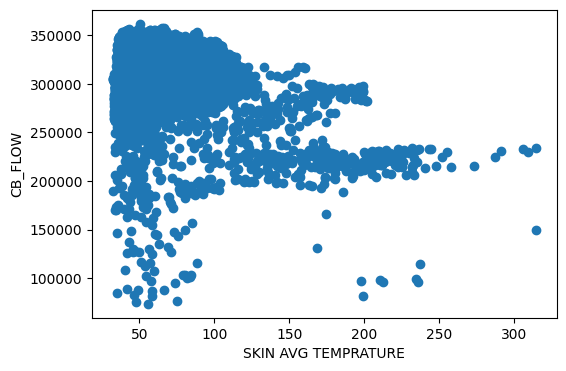

In [16]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(df["SKIN_TEMP_AVG"], df["CB_FLOW"])
ax.set_xlabel('SKIN AVG TEMPRATURE')
ax.set_ylabel('CB_FLOW')
plt.show()

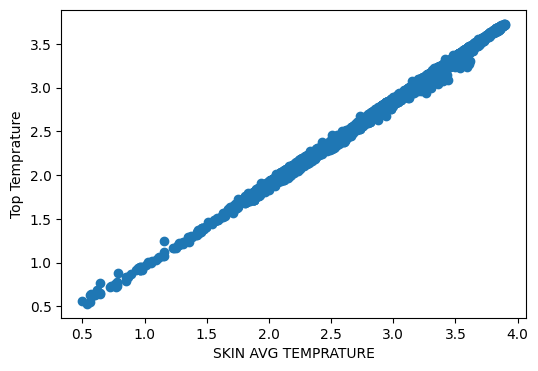

In [17]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(df["CB_PRESS"], df["HB_PRESS"])
ax.set_xlabel('SKIN AVG TEMPRATURE')
ax.set_ylabel('Top Temprature')
plt.show()

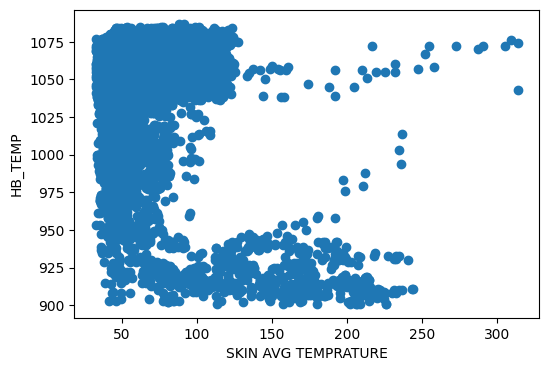

In [18]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(df["SKIN_TEMP_AVG"],df["HB_TEMP"])
ax.set_xlabel('SKIN AVG TEMPRATURE')
ax.set_ylabel('HB_TEMP')
plt.show()

In [ ]:
# import pandas as pd

# # Create an empty dataframe to store the rows
# new_df = pd.DataFrame(columns=df.columns)

# # Iterate over the rows of the old dataframe
# for index, row in df.iterrows():
#     # Add the row to the new dataframe
#     new_df = new_df.append(row)

# # Print the new dataframe
# print(new_df)

In [46]:
import pandas as pd
new_df = pd.DataFrame(columns=df.columns)
df["DATE_TIME"] = pd.to_datetime(df["DATE_TIME"])
for i in df["DATE_TIME"]:
    import datetime
    time = i.time()
    if time.strftime("%M") == "00" and time.strftime("%S") == "00":
        new_df = new_df.append(df.loc[df["DATE_TIME"] == i])
        new_df["CO/CO2"] = new_df["CO"] / new_df["CO2"]

C:\Users\sujan\AppData\Local\Temp\ipykernel_21160\3454184.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(df.loc[df["DATE_TIME"] == i])
C:\Users\sujan\AppData\Local\Temp\ipykernel_21160\3454184.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(df.loc[df["DATE_TIME"] == i])
C:\Users\sujan\AppData\Local\Temp\ipykernel_21160\3454184.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(df.loc[df["DATE_TIME"] == i])
C:\Users\sujan\AppData\Local\Temp\ipykernel_21160\3454184.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(df.loc[df["DATE_TIME"]

In [50]:
limit = new_df["DATE_TIME"].count()

In [58]:
new_df['Next_1hr'] = new_df['CO/CO2'].shift(-1)
new_df['Next_2hr'] = new_df['CO/CO2'].shift(-2)
new_df['Next_3hr'] = new_df['CO/CO2'].shift(-3)
new_df['Next_4hr'] = new_df['CO/CO2'].shift(-4)


In [59]:
new_df.to_excel("data/demo3.xlsx")

In [60]:
df = pd.read_excel("data/demo3.xlsx")
print(df)

      Unnamed: 0           DATE_TIME  CB_FLOW  CB_PRESS  CB_TEMP  STEAM_FLOW  \
0              5 2021-01-07 01:00:00   312520      3.20      126           4   
1             10 2021-01-07 02:00:00   311177      3.21      126           4   
2             16 2021-01-07 03:00:00   301825      3.17      127           4   
3             22 2021-01-07 04:00:00   313514      3.27      124           6   
4             28 2021-01-07 05:00:00   318428      3.21      127           6   
...          ...                 ...      ...       ...      ...         ...   
3574       25375 2021-12-31 19:00:00   278463      2.74       76           5   
3575       25381 2021-12-31 20:00:00   290690      2.75       76           4   
3576       25387 2021-12-31 21:00:00   280826      2.68       76           2   
3577       25393 2021-12-31 22:00:00   288396      2.83       76           3   
3578       25399 2021-12-31 23:00:00   288786      2.82       76           1   

      STEAM_TEMP  STEAM_PRESS  O2_PRESS

In [64]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=3500, n_features=28, n_informative=28, n_targets=4)

In [65]:
print(X)

[[-0.16991521  0.31382421  0.65513469 ... -0.77316757 -0.11311845
   0.27849112]
 [ 0.1137366   0.36409179  0.76531297 ... -0.95571683 -0.29163488
  -0.79547741]
 [-0.12846646 -1.1665214   0.47168926 ... -1.88972355 -1.57716471
  -0.5713744 ]
 ...
 [-0.84780252 -0.36942544  0.0272127  ...  1.87425396  1.18111263
   0.88097657]
 [ 0.63745614 -0.03006677 -0.61606659 ...  1.75173805 -0.75519915
  -1.25060457]
 [ 0.03728204  0.89904515  1.28386885 ... -1.53397361  0.00206828
   1.65692293]]


In [66]:
y

array([[ 343.04072923,  348.27805052,  331.46885306,  475.40533242],
       [-197.0834631 ,  460.73941338,  245.53998525,  126.33154097],
       [-566.97187642, -496.64693473, -392.38866223, -538.18791903],
       ...,
       [ 241.43764467,  371.95517459,  222.10313523,  185.17428259],
       [ -87.8850534 ,   35.53583939, -195.45124761, -280.75349495],
       [ -44.90070216,  134.94751195,  -61.36244294,  327.02929375]])

In [67]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X, y)

LinearRegression()